## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [2]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [3]:
!head Data/happiness2020.csv

country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
Afghanistan,2.566900015,0.470366955,52.59000015,0.39657300700000003,-0.0964294,0.9336865540000001,South Asia
Albania,4.882699966000001,0.671070457,68.70813751,0.7819942240000001,-0.042309489000000006,0.896303713,Central and Eastern Europe
Algeria,5.005099773,0.8033851390000001,65.90517426,0.46661090899999996,-0.121105164,0.7354851370000001,Middle East and North Africa
Argentina,5.974699974,0.900567949,68.80380249,0.831132412,-0.194913864,0.8420098420000001,Latin America and Caribbean
Armenia,4.676799774,0.7574794290000001,66.75065613,0.7120178340000001,-0.13877961,0.7735447879999999,Commonwealth of Independent States
Australia,7.222799778,0.9448546170000001,73.60453796,0.915431738,0.19046016,0.41516912,North America and ANZ
Austria,7.294199944,0.9280458690000001,73.00250244,0.899989486,0.085429221,0.49995487899999996,Western Europe
Azerbaijan,5.164800167,0.

In [4]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
HAPPINESS_DATASET_CSV = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

In [5]:
 pd.__version__

'1.1.1'

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [6]:
happiness = pd.read_pickle(HAPPINESS_DATASET)
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [6]:
happiness = pd.read_csv(HAPPINESS_DATASET_CSV, sep=',')
happiness

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa


In [7]:
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


In [8]:
happiness['country'] = happiness['country'].apply(lambda x: x.lower())

In [9]:
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [10]:
country_features = pd.merge(happiness, countries, left_on='country', right_on = 'country_name')
country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,"98,6"
...,...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,venezuela,912050,25730435,"93,4"
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,vietnam,329560,84402966,"90,3"
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,yemen,527970,21456188,"50,2"
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,zambia,752614,11502010,"80,6"


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [11]:
country_features['happiness_score'].sort_values(ascending=False).head(10)

38     7.8087
31     7.6456
115    7.5599
50     7.5045
92     7.4880
87     7.4489
114    7.3535
88     7.2996
6      7.2942
72     7.2375
Name: happiness_score, dtype: float64

We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [12]:
where_happier = country_features.copy()
#where_happier

In [13]:
where_happier_grouped = where_happier.groupby(where_happier.world_region).agg(['mean', 'count'])
where_happier_grouped

happiness_score       social_support        \
                                              mean count           mean count   
world_region                                                                    
Central and Eastern Europe                5.891393    14       0.883027    14   
Commonwealth of Independent States        5.358342    12       0.856729    12   
East Asia                                 5.483633     3       0.873150     3   
Latin America and Caribbean               5.971280    20       0.853971    20   
Middle East and North Africa              5.269306    16       0.794934    16   
North America and ANZ                     7.173525     4       0.933842     4   
South Asia                                4.355083     6       0.674968     6   
Southeast Asia                            5.517788     8       0.829054     8   
Sub-Saharan Africa                        4.393856    32       0.694164    32   
Western Europe                            6.967405    20       0.917773    20   

                                   healthy_life_expectancy        \
                                                      mean count   
world_region                                                       
Central and Eastern Europe                       68.452411    14   
Commonwealth of Independent States               64.726558    12   
East Asia                                        68.864882     3   
Latin America and Caribbean                      66.878195    20   
Middle East and North Africa                     65.505087    16   
North America and ANZ                            72.177067     4   
South Asia                                       61.090106     6   
Southeast Asia                                   65.429071     8   
Sub-Saharan Africa                               55.641572    32   
Western Europe                                   72.821632    20   

                                   freedom_of_choices       generosity        \
                                                 mean count       mean count   
world_region                                                                   
Central and Eastern Europe                   0.780868    14  -0.139980    14   
Commonwealth of Independent States           0.784004    12  -0.041285    12   
East Asia                                    0.800610     3  -0.110081     3   
Latin America and Caribbean                  0.829322    20  -0.075523    20   
Middle East and North Africa                 0.714194    16  -0.079573    16   
North America and ANZ                        0.907045     4   0.164180     4   
South Asia                                   0.758113     6   0.034609     6   
Southeast Asia                               0.914866     8   0.112021     8   
Sub-Saharan Africa                           0.728991    32  -0.002495    32   
Western Europe                               0.857978    20   0.040858    20   

                                   perception_of_corruption        \
                                                       mean count   
world_region                                                        
Central and Eastern Europe                         0.844670    14   
Commonwealth of Independent States                 0.746387    12   
East Asia                                          0.757347     3   
Latin America and Caribbean                        0.795991    20   
Middle East and North Africa                       0.757591    16   
North America and ANZ                              0.431717     4   
South Asia                                         0.785063     6   
Southeast Asia                                     0.712395     8   
Sub-Saharan Africa                                 0.765513    32   
Western Europe                                     0.523861    20   

                                            area          population        
                                            mean count          mean count  
wor

In [14]:
where_happier_grouped.sort_values(by=[('happiness_score','mean')], ascending=False).head(10)

happiness_score       social_support        \
                                              mean count           mean count   
world_region                                                                    
North America and ANZ                     7.173525     4       0.933842     4   
Western Europe                            6.967405    20       0.917773    20   
Latin America and Caribbean               5.971280    20       0.853971    20   
Central and Eastern Europe                5.891393    14       0.883027    14   
Southeast Asia                            5.517788     8       0.829054     8   
East Asia                                 5.483633     3       0.873150     3   
Commonwealth of Independent States        5.358342    12       0.856729    12   
Middle East and North Africa              5.269306    16       0.794934    16   
Sub-Saharan Africa                        4.393856    32       0.694164    32   
South Asia                                4.355083     6       0.674968     6   

                                   healthy_life_expectancy        \
                                                      mean count   
world_region                                                       
North America and ANZ                            72.177067     4   
Western Europe                                   72.821632    20   
Latin America and Caribbean                      66.878195    20   
Central and Eastern Europe                       68.452411    14   
Southeast Asia                                   65.429071     8   
East Asia                                        68.864882     3   
Commonwealth of Independent States               64.726558    12   
Middle East and North Africa                     65.505087    16   
Sub-Saharan Africa                               55.641572    32   
South Asia                                       61.090106     6   

                                   freedom_of_choices       generosity        \
                                                 mean count       mean count   
world_region                                                                   
North America and ANZ                        0.907045     4   0.164180     4   
Western Europe                               0.857978    20   0.040858    20   
Latin America and Caribbean                  0.829322    20  -0.075523    20   
Central and Eastern Europe                   0.780868    14  -0.139980    14   
Southeast Asia                               0.914866     8   0.112021     8   
East Asia                                    0.800610     3  -0.110081     3   
Commonwealth of Independent States           0.784004    12  -0.041285    12   
Middle East and North Africa                 0.714194    16  -0.079573    16   
Sub-Saharan Africa                           0.728991    32  -0.002495    32   
South Asia                                   0.758113     6   0.034609     6   

                                   perception_of_corruption        \
                                                       mean count   
world_region                                                        
North America and ANZ                              0.431717     4   
Western Europe                                     0.523861    20   
Latin America and Caribbean                        0.795991    20   
Central and Eastern Europe                         0.844670    14   
Southeast Asia                                     0.712395     8   
East Asia                                          0.757347     3   
Commonwealth of Independent States                 0.746387    12   
Middle East and North Africa                       0.757591    16   
Sub-Saharan Africa                                 0.765513    32   
South Asia                                         0.785063     6   

                                            area          population        
                                            mean count          mean count  
wor

The first region has only a few countries! What are them and what is their score?

The first region is North America and ANZ and includes only 4 countries.  Its mean happiness_score corresponds to 7.1735

## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [15]:
country_features.head(10)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,"98,6"
5,australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,australia,7686850,20264082,"100,0"
6,austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,austria,83870,8192880,"98,0"
7,azerbaijan,5.1648,0.819308,65.508400,0.786824,-0.240255,0.552538,Commonwealth of Independent States,azerbaijan,86600,7961619,"97,0"
8,bahrain,6.2273,0.876342,68.500000,0.905856,0.133729,0.739347,Middle East and North Africa,bahrain,665,698585,"89,1"
9,bangladesh,4.8328,0.687293,64.503067,0.900625,-0.033665,0.661844,South Asia,bangladesh,144000,147365352,"43,1"


In [16]:
literacy100 = country_features[country_features['literacy']=='100,0']

for i in range(literacy100.shape[0]):
    region_name = literacy100['world_region'].iloc[i]
    country_name = literacy100['country'].iloc[i]
    happiness_score = literacy100['happiness_score'].iloc[i]
    print(region_name+'-'+country_name+ "({" + str(happiness_score) + "})")

North America and ANZ-australia({7.222799778})
Western Europe-denmark({7.645599842})
Western Europe-finland({7.808700085})
Western Europe-luxembourg({7.237500191})
Western Europe-norway({7.4879999160000015})


What is the global average?

In [17]:
#Write your code here

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [18]:
# Write your code here

Print the raw number and the percentage of world population that is illiterate.

In [19]:
# Write your code here

## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [20]:
country_features['population_density']=country_features.apply(lambda x: (x.population)/(x.area),axis = 1)
country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,population_density
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,"36,0",47.964474
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,"86,5",124.587971
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,"70,0",13.826065
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,"97,1",14.428413
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,"98,6",99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,venezuela,912050,25730435,"93,4",28.211650
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,vietnam,329560,84402966,"90,3",256.108041
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,yemen,527970,21456188,"50,2",40.639029
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,zambia,752614,11502010,"80,6",15.282748


What is the happiness score of the 3 countries with lowest population density?

In [21]:
country_features.sort_values(ascending=[False,True], by=['happiness_score', 'population_density']).head(10)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,population_density
38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,finland,338145,5231372,"100,0",15.470795
31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,denmark,43094,5450661,"100,0",126.483060
115,switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,switzerland,41290,7523934,"99,0",182.221700
50,iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,iceland,103000,299388,"99,9",2.906680
92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,norway,323802,4610820,"100,0",14.239628
87,netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,netherlands,41526,16491461,"99,0",397.135794
114,sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,sweden,449964,9016596,"99,0",20.038483
88,new zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,new zealand,268680,4076140,"99,0",15.170984
6,austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,austria,83870,8192880,"98,0",97.685466
72,luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,luxembourg,2586,474413,"100,0",183.454370


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and health like expectancy (y).

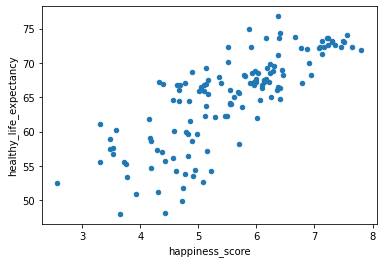

In [22]:
# Write your code here
%matplotlib inline
import matplotlib.pyplot as plt

ax = country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.